YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


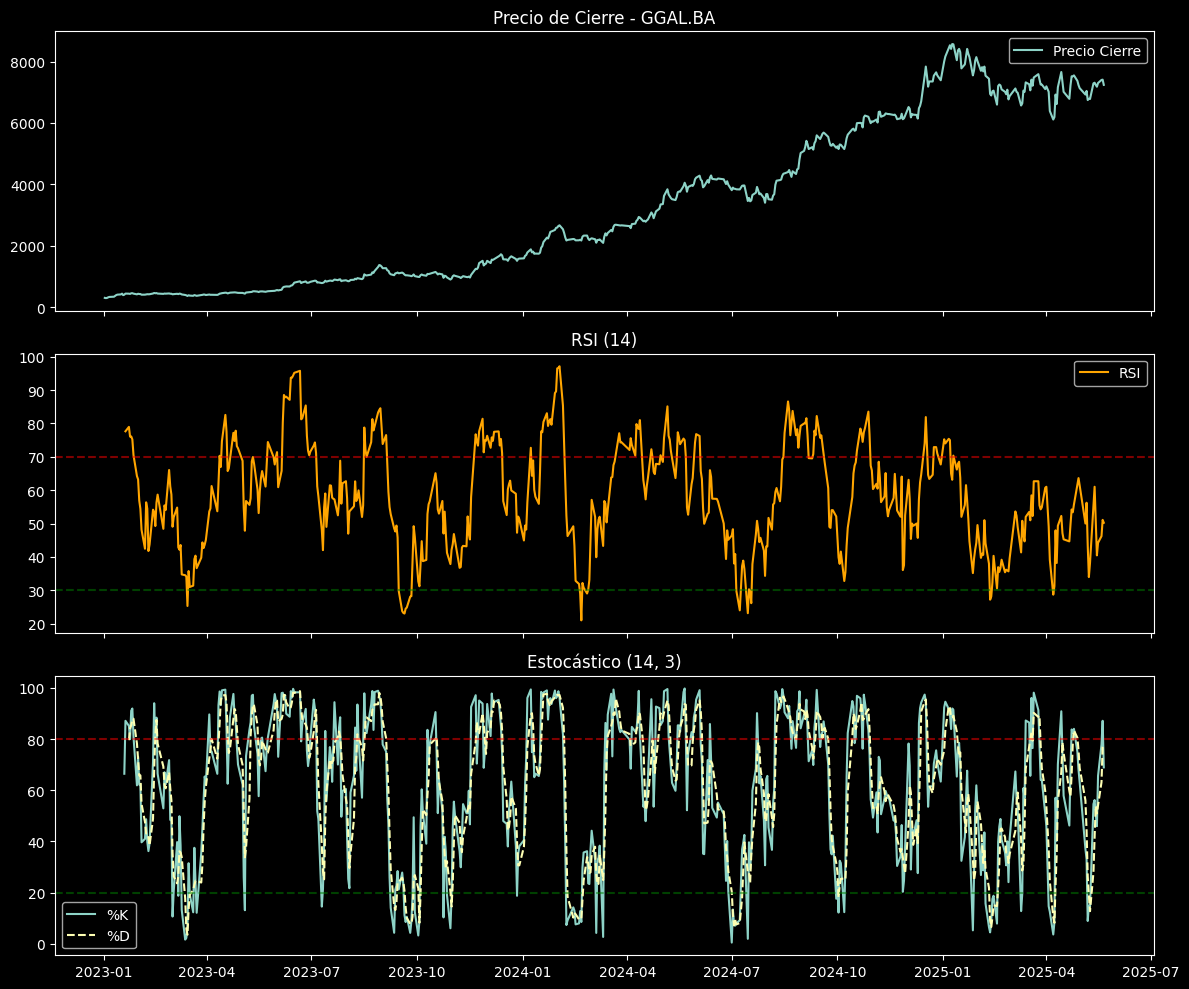

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
ticker = "GGAL.BA"  # Podés cambiar por AAPL, TSLA, etc.
df = yf.download(ticker, start="2023-01-01")

# =======================
# CÁLCULO DEL RSI (14 días)
# =======================
def calcular_rsi(series, periodo=14):
    delta = series.diff()
    ganancia = delta.clip(lower=0)
    perdida = -delta.clip(upper=0)

    media_ganancia = ganancia.rolling(periodo).mean()
    media_perdida = perdida.rolling(periodo).mean()

    rs = media_ganancia / media_perdida
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calcular_rsi(df['Close'])

# =======================
# CÁLCULO DEL ESTOCÁSTICO (14 días)
# =======================
def calcular_estocastico(df, k_period=14, d_period=3):
    low_min = df['Low'].rolling(k_period).min()
    high_max = df['High'].rolling(k_period).max()
    df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
    df['%D'] = df['%K'].rolling(d_period).mean()
    return df

df = calcular_estocastico(df)

# =======================
# GRÁFICOS
# =======================
plt.style.use('dark_background')

# Gráfico de precios + RSI + Estocástico
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Precio
axs[0].plot(df.index, df['Close'], label='Precio Cierre')
axs[0].set_title(f'Precio de Cierre - {ticker}')
axs[0].legend()

# RSI
axs[1].plot(df.index, df['RSI'], label='RSI', color='orange')
axs[1].axhline(70, color='red', linestyle='--', alpha=0.5)
axs[1].axhline(30, color='green', linestyle='--', alpha=0.5)
axs[1].set_title('RSI (14)')
axs[1].legend()

# Estocástico
axs[2].plot(df.index, df['%K'], label='%K')
axs[2].plot(df.index, df['%D'], label='%D', linestyle='--')
axs[2].axhline(80, color='red', linestyle='--', alpha=0.5)
axs[2].axhline(20, color='green', linestyle='--', alpha=0.5)
axs[2].set_title('Estocástico (14, 3)')
axs[2].legend()

plt.tight_layout()
plt.show()
